In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
csv_data = pd.read_csv('validation.csv')
print(csv_data.shape)

(303925, 25)


# optimal when number of agents is 50

In [38]:
def max_bid_price(num_agents, lowerlimit, upperlimit):
    bid_price_list=[]
    for i in range(num_agents):
        bid_price_i=random.uniform(lowerlimit, upperlimit)
        bid_price_list.append(bid_price_i)
    return(max(bid_price_list))

In [74]:
max_bidprice=130
min_bidprice=50
num_agent=50
click_total_50=[]
bid_price_list_50=[]
interval_list_50=[]
for upperlimit in range(min_bidprice,max_bidprice+1,5):
    for lowerlimit in range(min_bidprice,upperlimit,5):
        bid_price=max_bid_price(num_agent,lowerlimit, upperlimit)
        bid_price_list_50.append(bid_price)
        interval_list_50.append([lowerlimit,upperlimit])
        data_filtered_payprice=csv_data[(csv_data.payprice<bid_price)]
        click_total_individual_50=[]
        for interation in range(10):
            data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
            data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
            data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
            for i in range(len(data_filtered_payprice_random_array)):
                if data_filtered_payprice_random_cumsum[i] > 6250000:
                    break
            data_finally_filtered=data_filtered_payprice_random.head(i)
            click_for_one_50=sum(np.array(data_finally_filtered['click']))
            click_total_individual_50.append(click_for_one_50)
            click_total_individual_mean_50=np.mean(click_total_individual_50)
        click_total_50.append(click_total_individual_mean_50)
        print(click_total_50[-1])

48.0
49.0
49.0
53.0
53.0
53.0
58.0
58.0
58.0
58.0
67.9
65.8
64.8
67.8
66.5
75.2
74.9
76.0
74.3
77.5
73.7
71.4
73.1
72.1
71.5
72.1
70.4
71.3
68.8
75.7
75.7
70.6
75.7
74.4
71.2
74.1
73.2
71.7
70.3
70.0
72.0
71.0
71.5
69.1
72.0
69.0
71.9
69.5
71.0
69.5
70.5
67.2
70.5
70.6
71.4
67.0
69.3
67.2
67.5
69.8
67.4
69.8
68.4
70.1
71.6
68.9
65.8
68.7
67.0
67.9
63.9
66.2
62.8
66.9
60.8
64.9
65.8
66.0
65.5
66.1
64.7
64.6
64.9
69.2
66.4
64.0
64.7
63.5
60.8
65.7
62.4
63.0
63.6
63.5
62.5
65.3
65.7
62.5
60.6
63.3
62.3
66.1
64.9
63.0
62.9
69.3
67.6
64.0
63.9
63.8
63.9
66.0
62.1
65.7
65.7
68.7
63.6
63.7
62.9
65.1
61.0
61.6
61.0
63.3
62.9
65.5
64.1
60.4
65.3
62.9
62.8
64.0
63.5
61.8
64.6
63.9


In [77]:
len(click_total_50)

136

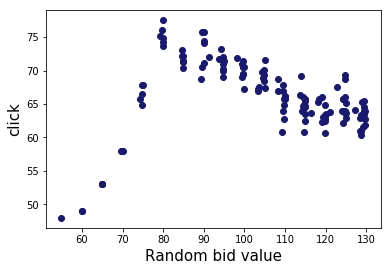

In [79]:
plt.scatter(bid_price_list_50,click_total_50, color='midnightblue')
plt.xlabel('Random bid value',fontsize=15)
plt.ylabel('click',fontsize=15)
plt.title('',fontsize=15)
plt.savefig('click_multiagent_50.jpg')

In [80]:
interval_list[click_total_50.index(max(click_total_50))]

[70, 80]

# n agent

In [48]:
def output_click_for_specific_bidprice (bid_price):
    data_filtered_payprice=csv_data[(csv_data.payprice<bid_price)]
    click_total_individual=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual)
    return click_total_individual_mean

In [54]:
output_click_for_specific_bidprice (130)

63.6

In [67]:
max_bidprice=130
min_bidprice=50

click_total=[]
bid_price_list=[]
interval_list=[]
click_for_one_agent_list=[]
for num_agent in range(50,101):
    for upperlimit in range(min_bidprice,max_bidprice+1,5):
        for lowerlimit in range(min_bidprice,upperlimit,5):
            bid_price=max_bid_price(num_agent,lowerlimit, upperlimit)
            bid_price_list.append(bid_price)
            interval_list.append([lowerlimit,upperlimit])
            data_filtered_payprice=csv_data[(csv_data.payprice<bid_price)]
            click_total_individual=[]
            for interation in range(10):
                data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
                data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
                data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
                for i in range(len(data_filtered_payprice_random_array)):
                    if data_filtered_payprice_random_cumsum[i] > 6250000:
                        break
                data_finally_filtered=data_filtered_payprice_random.head(i)
                click_for_one=sum(np.array(data_finally_filtered['click']))
                click_total_individual.append(click_for_one)
                click_total_individual_mean=np.mean(click_total_individual)
            click_total.append(click_total_individual_mean)
            print(click_total[-1])
    optimal_interval=interval_list[click_total.index(max(click_total))]
    new_bid_price=random.uniform(optimal_interval[0], optimal_interval[1])
    click_for_one_agent=output_click_for_specific_bidprice(new_bid_price)
    click_for_one_agent_list.append(click_for_one_agent)

48.0
49.0
49.0
53.0
53.0
53.0
58.0
58.0
58.0
58.0
66.1
67.9
67.9
68.1
66.6
74.2
75.7
76.0
76.6
75.7
75.3
73.9
72.3
72.0
72.7
72.2
72.2
71.6
69.0
74.4
68.7
72.7
74.9
71.3
76.2
73.8
72.1
73.1
71.0
71.7
70.6
67.9
71.1
68.0
71.3
69.5
70.0
73.7
71.6
69.3
67.4
70.0
71.2
69.2
71.3
68.9
67.7
62.9
67.5
68.2
68.8
65.6
70.2
70.2
66.3
68.2
66.1
63.3
64.6
65.2
66.2
64.7
65.5
60.1
64.9
67.3
65.4
63.0
68.3
59.7
65.6
66.2
64.8
65.1
64.5
64.2
63.2
65.3
62.8
65.1
67.4
65.2
61.8
65.4
63.6
63.5
64.4
61.0
66.9
66.9
61.4
63.1
62.9
64.6
66.4
64.2
66.8
63.8
62.5
62.9
66.7
63.5
64.2
62.6
63.1
62.6
61.7
66.2
61.8
63.6
64.0
62.5
64.2
61.0
60.7
61.7
62.7
60.5
62.7
64.0
65.6
66.0
61.2
61.9
62.8
61.7
48.0
49.0
49.0
53.0
53.0
53.0
58.0
58.0
58.0
58.0
66.7
67.1
66.3
65.6
67.1
75.5
76.6
75.2
74.0
76.5
75.2
73.5
72.4
73.5
71.6
72.2
73.2
72.8
74.3
70.5
75.0
71.2
73.0
70.9
74.2
70.7
69.7
71.8
72.0
70.8
70.6
69.0
69.7
70.1
73.2
69.2
69.2
71.8
73.1
68.9
68.2
70.5
70.9
68.5
67.2
66.2
66.4
66.2
68.3
67.5
70.8
69.9
67.3
65.0


58.0
58.0
58.0
65.6
65.6
68.1
66.5
67.7
74.4
75.5
75.2
75.7
74.5
75.8
69.7
74.7
72.4
73.3
70.8
70.7
71.4
73.6
70.1
72.6
72.1
72.1
72.2
72.5
74.2
71.8
70.7
70.2
72.2
71.1
71.0
68.6
68.1
68.6
67.5
71.5
68.8
69.9
68.6
71.1
71.2
70.2
70.2
68.8
67.0
65.4
73.2
67.0
65.5
74.6
68.5
68.8
66.4
68.4
72.3
63.9
66.9
65.2
66.4
67.4
67.7
67.5
65.9
65.2
65.9
63.9
64.8
63.0
69.8
65.7
64.3
65.8
64.2
64.2
60.4
63.3
64.8
66.0
63.8
61.0
62.2
66.2
65.3
66.2
66.8
62.8
63.7
63.2
62.3
65.0
60.0
64.4
64.7
64.2
61.3
64.2
67.7
61.9
63.0
61.7
63.7
63.0
61.6
62.2
65.0
65.1
63.0
63.4
64.7
61.1
62.7
62.3
64.4
64.5
55.7
62.7
63.8
61.2
64.6
64.7
64.3
63.8
64.4
63.1
63.6
48.0
49.0
49.0
53.0
53.0
53.0
58.0
58.0
58.0
58.0
66.6
65.6
68.0
67.7
66.9
76.4
73.9
75.3
75.4
76.1
74.8
69.9
71.1
75.1
68.6
71.8
71.6
73.3
73.0
69.0
74.2
70.6
70.5
72.9
72.7
71.0
69.1
69.9
68.3
72.9
68.3
71.8
69.8
73.0
70.9
67.0
71.1
69.5
67.7
72.3
67.9
69.3
73.9
69.6
70.8
66.7
68.0
69.0
66.4
70.4
65.6
68.9
66.2
67.4
70.1
66.2
67.6
65.5
66.0
66.6
67.2


66.2
76.8
77.0
75.2
74.6
76.0
77.0
75.4
68.1
71.6
72.3
71.0
72.3
71.2
72.5
72.6
72.5
76.1
72.0
73.0
75.1
72.3
69.2
72.2
69.9
69.1
70.5
68.8
72.4
70.6
70.1
68.3
71.3
70.8
70.8
71.7
70.9
68.9
67.8
70.6
71.1
67.6
65.8
68.6
69.0
69.3
68.7
68.0
67.3
65.7
68.5
67.7
65.5
64.3
63.9
63.0
65.9
67.1
67.7
61.5
68.9
64.2
68.5
67.1
63.9
62.2
64.3
65.1
65.6
64.6
65.0
65.2
63.3
65.9
65.7
63.3
64.5
63.5
64.1
65.6
65.4
61.7
62.7
65.0
63.0
64.1
64.3
64.9
63.7
64.8
62.6
66.6
64.9
64.9
63.6
64.6
67.7
61.8
64.6
62.4
63.3
61.9
65.4
65.1
64.5
63.9
66.3
63.3
63.0
63.2
63.0
65.0
62.7
64.6
63.2
65.1
63.0
61.6
65.2
62.2
61.6
63.2
48.0
49.0
49.0
53.0
53.0
53.0
58.0
58.0
58.0
58.0
68.5
67.7
66.3
67.4
67.7
74.0
74.8
76.5
74.9
75.9
76.9
74.2
71.6
70.9
73.7
72.9
72.4
70.3
70.2
73.4
72.8
71.9
68.9
72.4
74.0
73.9
69.4
68.1
68.9
70.6
71.6
71.1
72.2
69.0
70.6
72.4
73.0
70.4
68.1
70.6
71.4
69.6
70.0
68.9
69.6
68.6
68.7
68.2
70.5
70.2
63.6
68.9
68.7
67.3
69.5
71.3
66.2
65.5
65.5
66.2
65.6
66.7
65.9
69.5
65.3
64.5
66.4
67.8


70.1
72.0
71.2
72.2
70.6
73.2
72.7
69.7
69.1
70.9
71.2
72.6
74.0
69.8
73.4
72.0
70.5
69.5
70.5
70.7
71.2
73.1
67.4
66.8
68.7
68.8
68.9
70.3
71.0
69.5
72.7
72.0
67.6
67.3
66.1
68.2
69.9
67.6
69.7
63.1
69.6
67.1
67.7
69.0
68.7
67.7
68.2
67.1
67.7
67.0
65.1
64.0
68.7
66.3
67.3
63.7
64.8
61.4
66.3
67.5
66.2
65.9
66.0
62.0
64.0
63.6
66.4
62.3
65.6
62.6
62.4
67.1
66.6
64.8
64.0
62.2
64.6
62.8
63.4
64.9
67.5
63.3
62.6
63.9
65.6
66.1
64.6
65.2
62.5
61.5
63.9
63.5
62.4
64.6
62.0
63.8
62.9
63.1
59.6
64.7
62.0
62.2
61.1
64.1
64.6
63.8
63.3
60.1
63.8
64.0
62.0
65.2
59.3
65.2
64.1
48.0
49.0
49.0
53.0
53.0
53.0
58.0
58.0
58.0
58.0
68.4
66.5
67.9
68.3
68.0
75.0
77.3
76.3
76.3
77.5
77.6
73.5
69.5
72.3
68.4
75.2
71.5
73.2
71.0
68.8
73.0
72.0
70.0
71.1
74.0
75.5
74.2
68.4
70.5
71.2
67.3
71.3
69.8
70.7
67.9
73.9
69.6
69.8
71.4
67.4
71.1
68.6
69.0
71.1
67.6
67.9
69.9
67.2
70.4
67.5
65.9
67.6
69.5
68.0
67.1
67.5
64.3
65.1
65.6
64.1
66.7
62.5
65.7
68.1
64.6
65.4
68.5
63.5
65.1
66.0
62.5
63.1
64.9
65.1
63.0


71.8
71.2
70.2
71.3
71.7
70.7
72.0
73.7
73.3
72.0
76.0
69.6
73.1
70.7
70.9
70.5
71.4
70.7
70.0
68.1
74.6
68.7
65.0
70.8
69.4
69.1
68.1
67.2
68.3
70.0
67.6
67.2
69.1
65.9
66.7
68.5
64.8
68.8
63.4
64.7
66.5
68.5
64.4
66.1
64.9
64.6
67.0
65.1
65.2
66.0
61.0
61.8
61.8
64.0
66.1
65.6
65.4
62.0
64.5
63.8
64.9
64.8
65.4
64.7
60.7
62.5
62.7
62.7
63.4
61.9
66.9
63.7
63.4
61.7
63.9
65.6
63.8
62.0
64.6
62.5
63.5
62.4
62.2
66.1
64.7
64.9
65.9
64.5
63.7
61.6
64.2
66.6
65.7
65.0
58.7
61.0
62.7
60.8
61.7
67.2
66.3
62.7
64.5
62.6
64.1
63.7
62.5
63.6
48.0
48.9
49.0
53.0
53.0
53.0
58.0
58.0
58.0
58.0
67.1
66.7
66.8
67.6
68.9
74.4
72.9
76.4
74.4
74.6
74.7
70.8
71.4
71.8
73.3
74.7
71.0
72.4
72.6
71.7
73.1
71.6
72.8
72.7
72.0
70.9
69.9
69.2
71.6
71.3
68.3
72.1
71.1
71.7
69.8
70.4
75.2
69.6
70.4
65.5
70.0
72.6
68.5
70.2
66.0
69.3
68.2
65.6
64.3
65.4
66.4
70.8
68.1
66.5
70.5
66.7
66.8
67.2
67.0
65.4
67.6
62.9
63.5
64.5
65.6
67.3
70.3
64.1
63.7
65.1
65.1
62.3
68.4
66.1
66.3
64.1
65.4
65.4
64.2
63.3
65.6
66.0


In [81]:
len(click_for_one_agent_list)

51

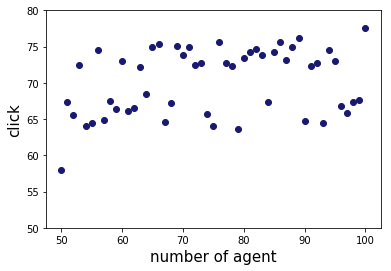

In [83]:
plt.scatter(range(50,101),click_for_one_agent_list, color='midnightblue')
plt.xlabel('number of agent',fontsize=15)
plt.ylabel('click',fontsize=15)
plt.ylim(50,80)
plt.title('',fontsize=15)
plt.savefig('click_number of agent.jpg')

In [84]:
interval_list[click_total.index(max(click_total))]
#optimal for multiagent case

[75, 80]

In [17]:
def output_interval(min_bidprice,max_bidprice):
    click_total=[]
    bid_price_list=[]
    interval_list=[]
    for upperlimit in range(min_bidprice,max_bidprice+1,5):
        for lowerlimit in range(min_bidprice,upperlimit,5):
            bid_price=random.uniform(lowerlimit, upperlimit)
            bid_price_list.append(bid_price)
            interval_list.append([lowerlimit,upperlimit])
            data_filtered_payprice=csv_data[(csv_data.payprice<bid_price)]
            click_total_individual=[]
            for interation in range(10):
                data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
                data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
                data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
                for i in range(len(data_filtered_payprice_random_array)):
                    if data_filtered_payprice_random_cumsum[i] > 6250000:
                        break
                data_finally_filtered=data_filtered_payprice_random.head(i)
                click_for_one=sum(np.array(data_finally_filtered['click']))
                click_total_individual.append(click_for_one)
                click_total_individual_mean=np.mean(click_total_individual)
            click_total.append(click_total_individual_mean)
            #print(click_total[-1])
    return interval_list[click_total.index(max(click_total))]    